# Projet

Le projet proposé ici consiste à simuler une expérience de retournement temporel ultrasonore. Nous allons pour cela utiliser un réseau de $2N_r+1$ transducteurs élémentaires de géométrie circulaire immergé dans l'eau. La vitesse de propagation des ondes ultrasonores dans l'eau est $c=1.5$ mm/$\mu$s.

Chaque transducteur est supposé de rayon $a$, les transducteurs sont disposés périodiquement selon l'axe $x$ dans le plan $z=0$. On suppose également que l'espace intersticiel entre deux transducteurs successifs est nul.

### Calcul de la réponse de diffraction d'un transducteur mono-élément

Sous réserve de supposer une vibration en mode piston avec une amplitude uniforme sur toute la surface du disque de rayon $a$ centré en $x=y=z=0$, la réponse impulsionnelle de diffraction au point $(r,z)$ est donnée par la formule suivante :

- si le point est dans l'ombre géométrique du disque diffractant ($r<a$)

$$h(r,z,t)\propto\left\{
\begin{array}{ll}
0 & \mathrm{si~} ct<z \\
1 & \mathrm{si~} z<ct<\sqrt{z^2+(a-r)^2} \\
\displaystyle\frac{1}{\pi}\cos^{-1}\left(\frac{r^2+c^2t^2-z^2-a^2}{2r\sqrt{c^2t^2-z^2}}\right)
& \mathrm{si~} \sqrt{z^2+(a-r)^2}<ct<\sqrt{z^2+(a+r)^2} \\
0 & \mathrm{si~} \sqrt{z^2+(a+r)^2}<ct \\
\end{array}
\right.
$$

- si le point est en dehors de l'ombre géométrique du disque diffractant ($r>a$)

$$h(r,z,t)\propto\left\{
\begin{array}{ll}
0 & \mathrm{si~} ct<\sqrt{z^2+(a-r)^2} \\
\displaystyle\frac{1}{\pi}\cos^{-1}\left(\frac{r^2+c^2t^2-z^2-a^2}{2r\sqrt{c^2t^2-z^2}}\right)
& \mathrm{si~} \sqrt{z^2+(a-r)^2}<ct<\sqrt{z^2+(a+r)^2} \\
0 & \mathrm{si~} \sqrt{z^2+(a+r)^2}<ct \\
\end{array}
\right.
$$

Calculer et représenter graphiquement $h(r,t)$ pour un transducteur de diamètre $2a=5$ mm pour un point d'observation situé dans le plan $z=10$ mm et variant entre $r=0$ mm et $r=5$ mm. On veillera à évaluer les paramètres d'échantillonnage temporel pertinents.

Pour la représentation graphique on pourra utiliser
- un graphique 3D $(r, t, h(r,t))$
- un graphique en courbes de niveaux
- un graphique avec quelques points particuliers de l'espace choisis

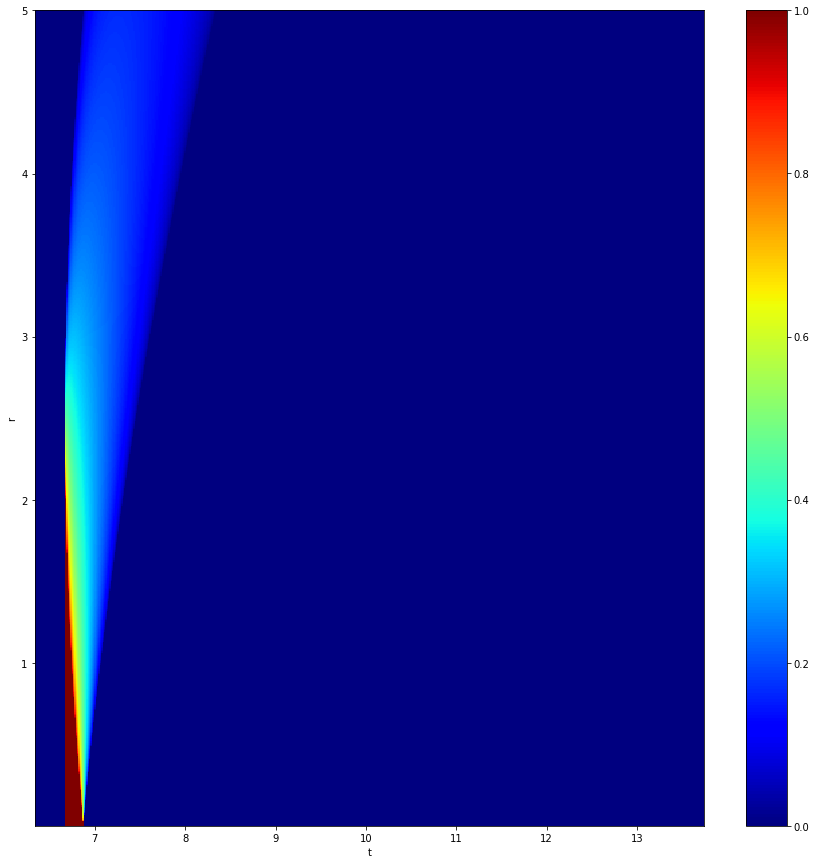

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  # Fonction pour la 3D
import numpy as np

c = 1.5
N = 500
a = 2.5
z = 10
r = np.linspace(0.001,5, N) 
t = np.linspace(0.95*z/c,2*np.sqrt(z**2+a**2)/c, N)
h_list1 = np.ones((len(r),len(t)))

def h(a,r,z,t):
    
    if r<=a:
        
        if c*t < z:
            return(0)
        elif z<c*t and c*t<np.sqrt(z**2+(a-r)**2):
            return(1)
        elif np.sqrt(z**2+(a-r)**2)<c*t and c*t<np.sqrt(z**2+(a+r)**2):
            return(1/np.pi*np.arccos((r**2+c**2*t**2-z**2-a**2)/(2*r*np.sqrt(c**2*t**2-z**2))))
        else:
            return(0)
    else:
        if c*t<np.sqrt(z**2+(a-r)**2):
            return(0)
        elif np.sqrt(z**2+(a-r)**2)<c*t and c*t<np.sqrt(z**2+(a+r)**2):
            return(1/np.pi*np.arccos((r**2+c**2*t**2-z**2-a**2)/(2*r*np.sqrt(c**2*t**2-z**2))))
        else:
            return(0)


for i in range(len(r)):
    for j in range(len(t)):
        h_list1[i,j] = h(a, r[i], z, t[j])


"""
ax = fig.gca(projection='3d')  # Affichage en 3D
ax.plot_wireframe(r, t, h_list)  # Tracé filaire
plt.title("Tracé filaire")
ax.set_xlabel('r')
ax.set_ylabel('t')
ax.set_zlabel('h(r,t)')

plt.show()

"""
fig, ax = plt.subplots(figsize=(15, 15))

c = ax.pcolormesh(t, r, h_list1, cmap='jet')
ax.set_xlabel('t')
ax.set_ylabel('r')

fig.colorbar(c, ax=ax)
plt.show()

La formule précédente correspond à une formulation impulsionnelle de la diffraction. Par ailleurs la quantité $h(r,t)$ correspond à un potentiel de vitesse, qui n'est pas une grandeur physique observable.

En pratique on fonctionne en régime transitoire avec un signal d'entrée $e(t)$. Dans ce cas la pression acoustique mesurable est donnée par
$$p(r,t)\propto e(t)\frac{\ast}{t}\frac{\partial h(r,t)}{\partial t}$$

Pour le signal d'entrée on pourra considérer une fonction monochromatique à la fréquence centrale $f_c=2$ MHz et une bande passante de 100%, comme calculée lors de la séance portant sur l'analyse spectrale.

Calculer et représenter graphiquement $p(r,t)$.

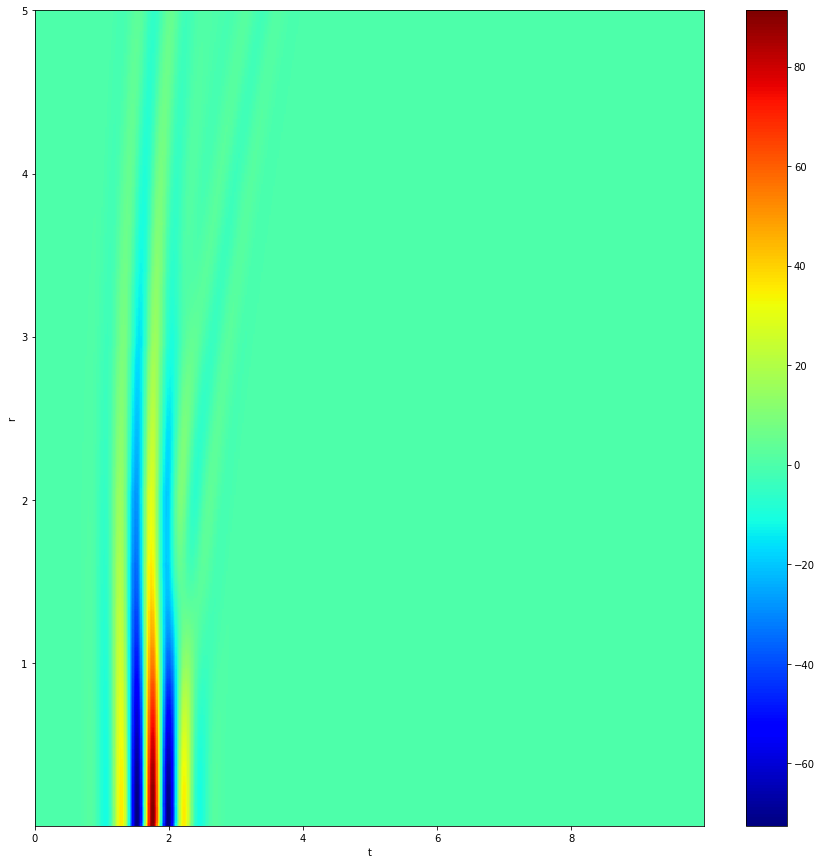

In [21]:
c = 1.5
N = 500
a = 2.5
z = 10
r = np.linspace(0.001,5, N)
#t = np.linspace(0.95*z/c,2*np.sqrt(z**2+a**2)/c, N) je sais pas pourquoi on met pas ça comme au dessus
t = np.linspace(0,10, N)
pas = t[1]-t[0]
f_e = 1/t[1]
h_list2 = np.ones((len(r),len(t)))
#p_list2 = np.ones((len(r),len(t)))

def e(f_c, b_w, N):
    t = np.linspace(-(N-1)/2, (N-1)/2, N)/f_e
    alpha = np.pi/np.log(2)*(b_w*f_c/2)**2
    S = np.sin(2*np.pi*f_c*t)*np.exp(-alpha*t**2)
    return(S)

for i in range(len(r)):
    for j in range(len(t)):
        h_list2[i,j] = h(a, r[i], z, t[j]) 

def dh(h_list,pas):
    return np.diff(h_list)/pas

def convolution(signal_entree, dh_list):
    E = np.fft.fft(signal_entree[:-1])
    H = np.fft.fft(dh_list)
    res = np.ones(np.shape(H),dtype=np.complex128)
    for i in range(len(dh_list[0])):
        res[i]=np.fft.ifft(E*H[i])
    return(res)

p_list2 = np.real(convolution(e(2,1,N),dh(h_list2,pas)))

fig, ax = plt.subplots(figsize=(15, 15))

C = ax.pcolormesh(t[:-1], r, p_list2, cmap='jet')
ax.set_xlabel('t')
ax.set_ylabel('r')

fig.colorbar(C, ax=ax)
plt.show()

### Calcul du champ reçu en provenance d'une source ponctuelle

On positionne une source ponctuelle en avant du réseau de transducteurs, en $r=r_s$ et $z=z_s=10$ mm. Cette source émet une impulsion brève (du genre $e(t)$) et le réseau de transducteurs est utilisé en mode réception, chaque élément recevant un signal temporel spécifique.

Par application du principe de réciprocité, le champ créé par la source et mesuré par un transducteur est identique au champ qu'aurait généré ce transducteur mesuré à la position de la source.

Calculer et représenter graphiquement la série de signaux temporels mesurés par le réseau de transducteurs en fonction de la position de la source ponctuelle.

On pourra considérer $N_r=16$, ce qui correspond à un réseau de 33 transducteurs élémentaires. On réduit le rayon des transducteurs à 0.5 mm. On veillera à assurer que les réponses impulsionnelles de diffraction sont non nulles sur au minimum 2 échantillons temporels.

IndexError: index 1964 is out of bounds for axis 0 with size 500

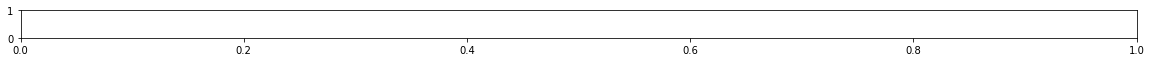

In [24]:
c = 1.5
N = 500
a = 2.5
z = 10
N_r = 16
r_max = 21
r = np.linspace(0.001,r_max, N)
#t = np.linspace(0.95*z/c,2*np.sqrt(z**2+a**2)/c, N) je sais pas pourquoi on met pas ça comme au dessus
t = np.linspace(0,10, N)
pas = t[1]-t[0]
f_e = 1/t[1]
h_list3 = np.ones((len(r),len(t)))


for i in range(len(r)):
    for j in range(len(t)):
        h_list3[i,j] = h(a, r[i], z, t[j]) 

p_list3 = np.real(convolution(e(2,1,N),dh(h_list3,pas)))


def transducteur_reception(N_r, r_s, r_max):
    Signaux = np.ones((2*N_r+1,len(t)-1))
    j = 0
    for i in range(-N_r,N_r+1):
        distance = abs(r_s - i*2*a)
        Signaux[j,:] = p_list3[int(round(N*distance/r_max)),:]
        j += 1
    return(Signaux)

fig=plt.figure(figsize=(20,20))

for i in range(2*N_r+1):
    plt.subplot(2*N_r+1,1,i+1)
    plt.plot(transducteur_reception(16,2.5,r_max)[i])

### Retournement temporel du champ reçu

Les systèmes piézo-électriques peuvent fonctionner aussi bien en réception qu'en émission. On va donc utiliser la série de signaux mesurés par notre réseau de transducteurs en provenance de la source initiale pour automatiquement refocaliser le champ vers cette position.

Pour cela on retourne temporellement chacun des signaux reçus, ces signaux après retournement temporel seront par la suite utilisés comme sources d'émission voie par voie.

Calculer et représenter les signaux retournés temporellement.

In [25]:
def retournement_temporel(Signaux):
    return(np.concatenate((np.flip(Signaux, axis=1),np.zeros((33,1))),axis=1))

Signaux = retournement_temporel(transducteur_reception(16, 0))

fig=plt.figure(figsize=(20,20))
for i in range(2*N_r+1):
    
    plt.subplot(2*N_r+1,1,i+1)
    plt.plot(Signaux[i])

TypeError: transducteur_reception() missing 1 required positional argument: 'r_max'

### Calcul du champ focalisé

Pour un point situé en avant du réseau (on pourra dans un premier temps se positionner dans le plan $z=z_s$ de la source initiale), calculer le champ rayonné par le réseau de transducteurs après retournement temporel des signaux reçus au cours de la première étape.

Représenter en fonction de la position du point de calcul l'amplitude maximale du champ de pression.
On pourra examiner plus précisément deux directions particulières d'exploration du champ :
- parallèlement au réseau de transducteurs, dans le plan $z=z_s$ de la source initiale
- perpendiculairement au réseau de transducteurs, selon la droite $x=x_s$ de la source initiale

Retrouver l'effet de la focalisation ; quelle est la forme de la tâche focale ?

On pourra également faire une exploration 2D du champ diffracté dans le plan $(x,z)$ autour de la position de la source initiale $(x_s, z_s)$. 

Les calculs peuvent rapidement être un peu longs, on pourra clairement tirer avantage du calcul parallèle.

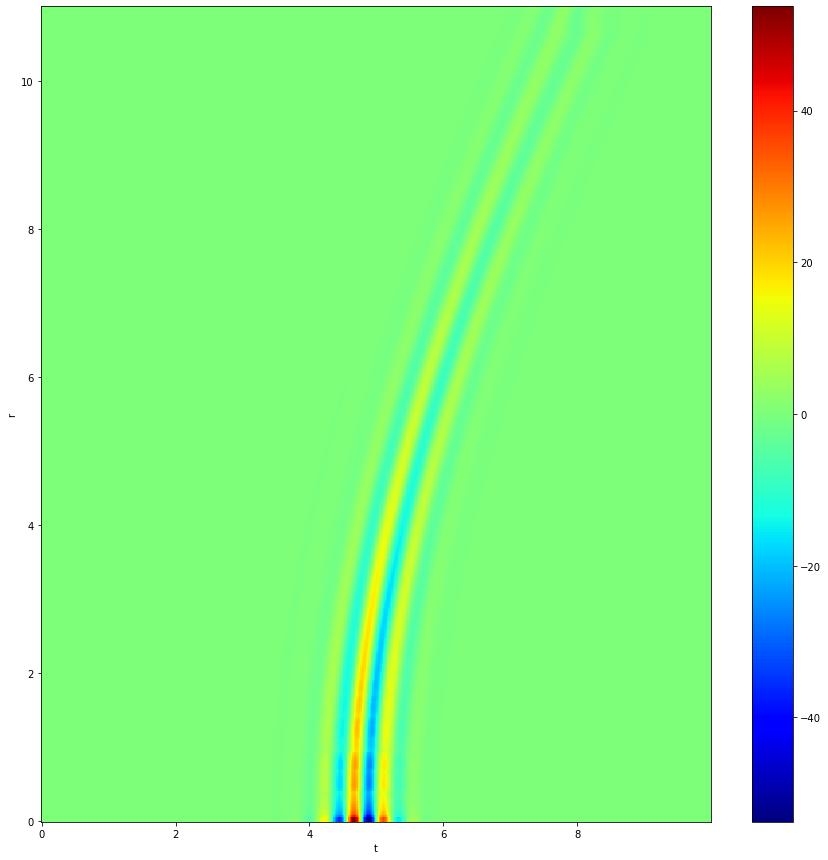

In [143]:

p_list_f = np.zeros((len(r),len(t)-1))

for i in range(2*N_r+1):
    
    n_prime = 
    
    
    p_list_f += np.real(convolution(retournement_temporel(transducteur_reception(16, 2.5))[i],dh(h_list,pas)))

#p_list = np.real(convolution(retournement_temporel(transducteur_reception(16, 2.5))[16],dh(h_list,pas)))
fig, ax = plt.subplots(figsize=(15, 15))

C = ax.pcolormesh(t[:-1], r, p_list_f, cmap='jet')
ax.set_xlabel('t')
ax.set_ylabel('r')

fig.colorbar(C, ax=ax)
plt.show()

### Forme de la tâche focale

Théoriquement, on peut prévoir que la tâche focale a parallèlement au réseau de trasducteurs une taille proportionnelle à 
$$\lambda \frac{F}{O}$$
où
- $\lambda$ est la longueur d'onde
- $F$ est la distance focale (profondeur de la source initiale)
- $O$ est l'ouverture de la surface diffractante (ouverture totale du réseau de transducteurs

Imaginer une expérience numérique permettant de vérifier cette propriété.
